## Notebook used to make synthetic disease progressions for healthy, LIR & MIR subgroups

In [3]:
# load packages and files

using DifferentialEquations, SciMLBase, Plots, Random # for solving ODEs
using DataFrames
using DataStructures # for the OrderedDict
using LatinHypercubeSampling # for the LHS
using Trapz # for the trapezoidal rule
Random.seed!(1234)

include("../EDES/including.jl") # for the EDES model 
include("../DataGeneration/AnalyseSynths/SyntheticPatients.jl") # for generating initial states of the synthetic patients
include("../DataGeneration/AnalyseSynths/LocalSensitivity.jl") # for the local sensitivity analysis
include("MIRLIR_progression.jl") # for the MIRLIR disease trajectories
include("../DataGeneration/AnalyseSynths/Realism_inital.jl") # for the analysis of the synthetic patients

ensure_realism_initial (generic function with 3 methods)

In [2]:
# hyperparameters for the data generation
N = 75 # for every subgroup
BW = 70 
noise_percentage = 0.1
initial_k5 = 0.112
initial_k6 = 2.03
initial_k4 = 2.35e-4
initial_G_liv_b = 0.043
parameter_names = ["k4","k5", "k6", "G_liv_b"]
initial_people = [initial_k4, initial_k5, initial_k6, initial_G_liv_b]
fasting_range_glucose = (4.8, 5.2)
fasting_range_insulin = (7.5, 12.0)

# standard deviations for the parameters, right now
lower_deviations_initial = initial_people .- (initial_people .* noise_percentage )
upper_deviations_initial = initial_people .+ (initial_people .* noise_percentage )


parameter_ranges_initial= OrderedDict( "k4" => (lower_deviations_initial[1], upper_deviations_initial[1]),
                                    "k5" => (lower_deviations_initial[2], upper_deviations_initial[2]),
                                    "k6" => (lower_deviations_initial[3], upper_deviations_initial[3]),
                                    "G_liv_b" => (lower_deviations_initial[4], upper_deviations_initial[4])
                                   )
fasting_ranges = OrderedDict("fasting_glucose" => fasting_range_glucose, "fasting_insulin" => fasting_range_insulin)


Synthetic_population_healthy = MakePatients(N, parameter_names, parameter_ranges_initial, fasting_ranges, BW = BW);

UndefVarError: UndefVarError: `OrderedDict` not defined

Check realism for the meal responses of all the initial patients 

In [54]:
boolean_vector = []
for i in 1:length(Synthetic_population_healthy)
    synthetic_patient = Synthetic_population_healthy[i]
    result = ensure_realism_initial(synthetic_patient)
    push!(boolean_vector, result)
end

boolean_vector;

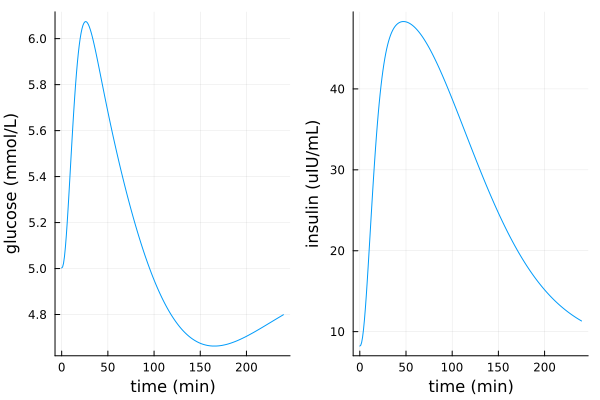

In [64]:
# visualise the synthetic patients
glucose_output =  PlotMealResponse(Synthetic_population_healthy[1].EDES, Synthetic_population_healthy[1].ParameterValues)